Comparison of Step Function vs. Sigmoid


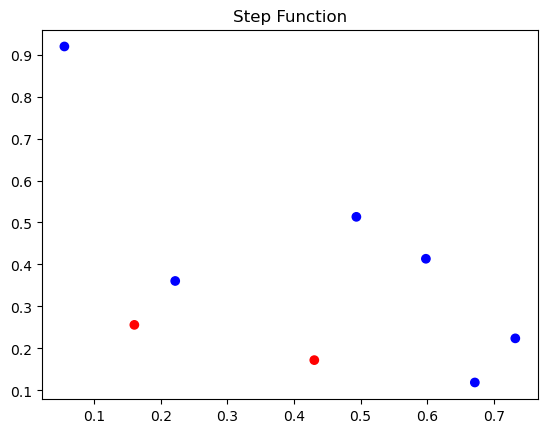

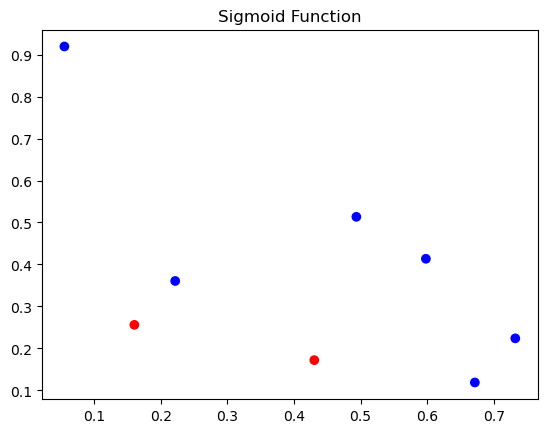

Comparison of Sigmoid vs. Tanh


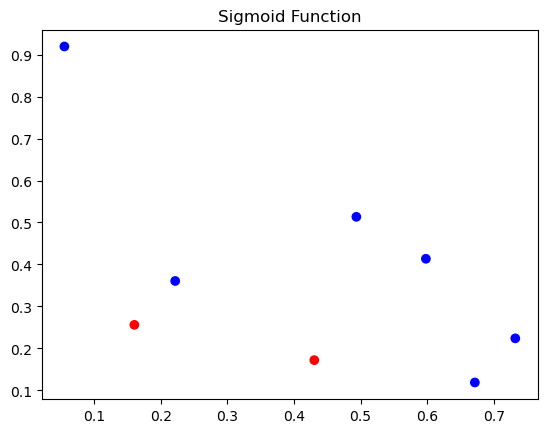

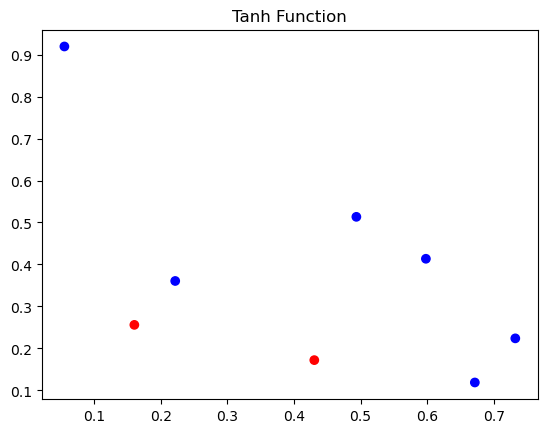

Comparison of ReLU vs. Sigmoid


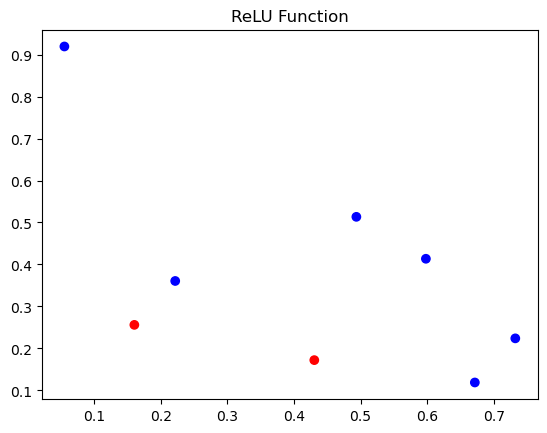

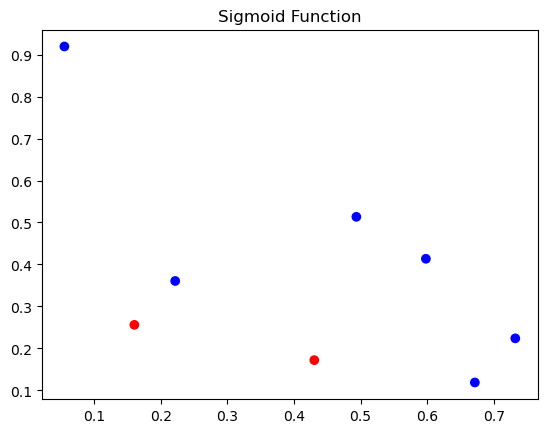

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Implement Single Layer Perceptron
class CustomPerceptron:
    def __init__(self, num_inputs, lr=0.1, epochs=10, activation_type='step'):
        self.weights = np.zeros(num_inputs + 1)  # Extra weight for bias
        self.lr = lr
        self.epochs = epochs
        self.activation_type = activation_type

    # 2. Modify the Perceptron to Use Sigmoid, Tanh, and ReLU Activation Functions
    def activate(self, value):
        if self.activation_type == 'step':
            return 1 if value >= 0 else 0
        elif self.activation_type == 'sigmoid':
            return 1 / (1 + np.exp(-value))
        elif self.activation_type == 'tanh':
            return np.tanh(value)
        elif self.activation_type == 'relu':
            return max(0, value)
        else:
            raise ValueError("Invalid activation function")

    def classify(self, input_data):
        weighted_sum = np.dot(input_data, self.weights[1:]) + self.weights[0]
        return self.activate(weighted_sum)

    def train_model(self, training_data, labels):
        for _ in range(self.epochs):
            for sample, target in zip(training_data, labels):
                output = self.classify(sample)
                error = target - output
                self.weights[1:] += self.lr * error * sample
                self.weights[0] += self.lr * error

# 3. Train the Model
X_train = np.random.rand(8, 3)  # 8 training samples, 3 features each
y_train = np.random.randint(0, 2, 8)  # Binary class labels
X_val = np.random.rand(5, 3)  # 5 validation samples
y_val = np.random.randint(0, 2, 5)

# Train and Compare Models
activation_funcs = ['step', 'sigmoid', 'tanh', 'relu']
models = {}
for func in activation_funcs:
    model = CustomPerceptron(num_inputs=3, activation_type=func)
    model.train_model(X_train, y_train)
    models[func] = model

# 7. Plot the decision boundary for different activation functions
def plot_decision_boundary(perceptron, X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    plt.title(title)
    plt.show()

# 4. Compare decision boundaries of Step Function vs. Sigmoid
def compare_step_sigmoid():
    print("Comparison of Step Function vs. Sigmoid")
    plot_decision_boundary(models['step'], X_train, y_train, "Step Function")
    plot_decision_boundary(models['sigmoid'], X_train, y_train, "Sigmoid Function")

# 5. Compare decision boundaries of Sigmoid vs. Tanh
def compare_sigmoid_tanh():
    print("Comparison of Sigmoid vs. Tanh")
    plot_decision_boundary(models['sigmoid'], X_train, y_train, "Sigmoid Function")
    plot_decision_boundary(models['tanh'], X_train, y_train, "Tanh Function")

# 6. Compare ReLU vs. Sigmoid for linear separability
def compare_relu_sigmoid():
    print("Comparison of ReLU vs. Sigmoid")
    plot_decision_boundary(models['relu'], X_train, y_train, "ReLU Function")
    plot_decision_boundary(models['sigmoid'], X_train, y_train, "Sigmoid Function")

# Execute Comparisons
compare_step_sigmoid()
compare_sigmoid_tanh()
compare_relu_sigmoid()